In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
import tensorflowjs as tfjs

2024-10-23 23:50:26.962788: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 23:50:26.967047: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 23:50:26.979732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 23:50:27.004585: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 23:50:27.011176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 23:50:27.031487: I tensorflow/core/platform/cpu_feature_gu

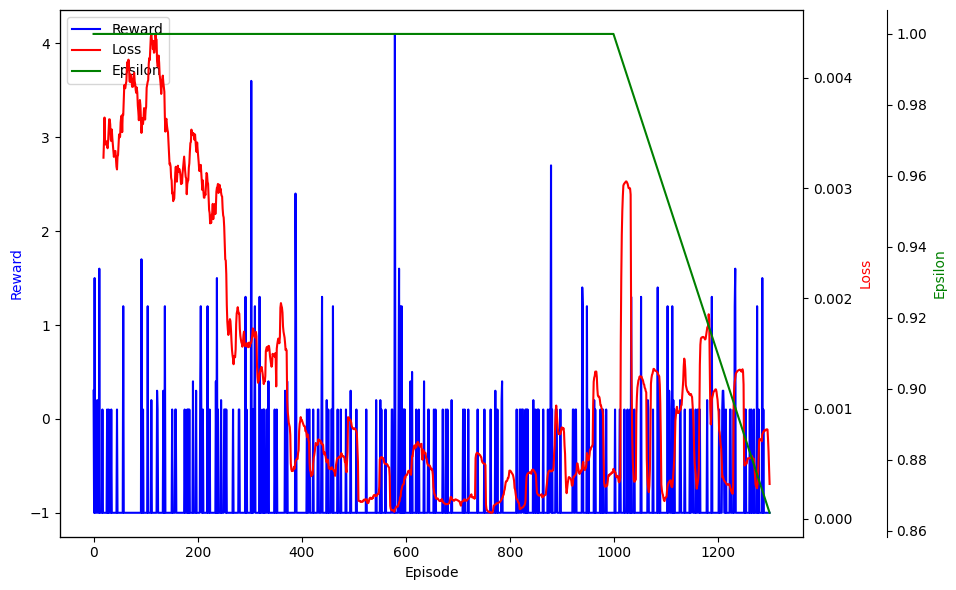

Episode: 1300, Avg Score: -0.72, Epsilon: 0.8650, Loss: 6.558997120009735e-05, Time: 159.54s


In [ ]:
from train import train_dqn

# Set the number of episodes for training
num_episodes = 10000

# Run the training
agent = train_dqn(num_episodes, True)

tfjs.converters.save_keras_model(agent.model.model, "model")